In [8]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from plot_utilities import add_margin, equalize_xy

In [ ]:
def xy_linear_regression_MLE(x, y):
    N = len(x)
    ev_x = np.mean(x)
    ev_y = np.mean(y)
    ev_xx = np.mean(x * x)
    ev_yx = np.mean(y * x)
    ev_yy = np.mean(y * y)

    a_MLE = (ev_yx - ev_y * ev_x) / (ev_xx - ev_x**2)
    b_MLE = ev_y - a_MLE * ev_x
    sigma2_MLE = 1.0/N * np.sum((y - (a_MLE * x + b))**2)
    
    return a_MLE, b_MLE, sigma2_MLE

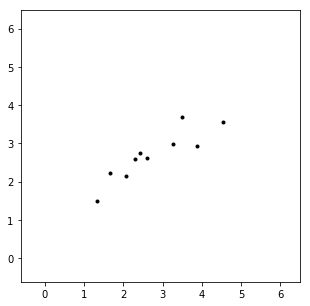

In [296]:
N = 10
a = 0.6
b = 1
sigma = 0.3


x = norm.rvs(loc=3, scale=1, size=N)
y = a*x + b + norm.rvs(loc=0, scale=sigma, size=N)

plt.figure(figsize=(5,5))
plt.plot(x, y, 'k.')
ax = plt.gca()
add_margin(ax, single_margin_ratio=0.5)
equalize_xy(ax)

In [297]:
x_publish = (x.round(1)*10).astype(int)
y_publish = (y.round(1)*10).astype(int)

In [365]:
print(', '.join(map(str, x_publish)))
print(', '.join(map(str, y_publish)))

21, 24, 17, 39, 23, 45, 33, 26, 13, 35
22, 27, 22, 29, 26, 36, 30, 26, 15, 37


In [366]:
x = x_publish
y = y_publish



In [367]:
N = len(x)
ev_x = np.mean(x)
ev_y = np.mean(y)
ev_xx = np.mean(x * x)
ev_yx = np.mean(y * x)
ev_yy = np.mean(y * y)

a_MLE = (ev_yx - ev_y * ev_x) / (ev_xx - ev_x**2)
b_MLE = ev_y - a_MLE * ev_x
sigma2_MLE = 1.0/N * np.sum((y - (a_MLE * x + b_MLE))**2)

In [368]:
ev_x

27.6

In [369]:
ev_y

27.0

In [370]:
ev_xx

854.0

In [371]:
ev_yx

798.9

In [372]:
a_MLE, b_MLE, sigma2_MLE

(0.5821769297484821, 10.931916738941894, 7.737098872506505)

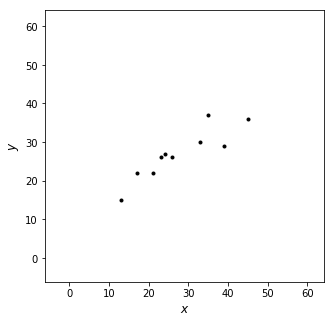

In [377]:
plt.figure(figsize=(5,5))
plt.plot(x, y, 'k.')
ax = plt.gca()
add_margin(ax, single_margin_ratio=0.5)
equalize_xy(ax)
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$y$', fontsize=12)

plt.savefig('./06-data.pdf', bbox_inches='tight')
plt.show()

In [374]:
dd_logPstar = - N / sigma2_MLE * \
            np.array([
                [ev_xx, ev_x, 0],
                [ev_x, 1, 0],
                [0, 0, 1/(2*sigma2_MLE)]
            ])
Sigma = np.linalg.inv(-dd_logPstar)

In [375]:
Sigma

array([[ 8.38800832e-03, -2.31509030e-01,  0.00000000e+00],
       [-2.31509030e-01,  7.16335910e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.19725398e+01]])

In [310]:
from scipy.stats import invgamma, t

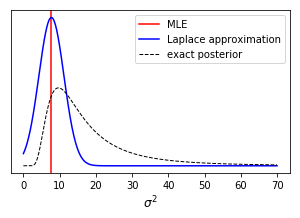

In [362]:
plt.figure(figsize=(5,3))
sigma2_draw = np.linspace(0, 70, 1000)
plt.axvline(sigma2_MLE, color='red', label='MLE')
plt.plot(sigma2_draw, norm.pdf(sigma2_draw, 
                               loc=sigma2_MLE, 
                               scale=np.sqrt(Sigma[2,2])),
        color='blue',
        label='Laplace approximation')
plt.plot(sigma2_draw, invgamma.pdf(sigma2_draw, 
                                   a=(N-4)/2, 
                                   scale=N*sigma2_MLE / 2),
        ls='--', lw=1, color='k', label='exact posterior')
plt.xlabel('$\sigma^2$', fontsize=12)
plt.legend()
plt.gca().set_yticks([])
plt.savefig('./06-sigma2.pdf', bbox_inches='tight')
plt.show()

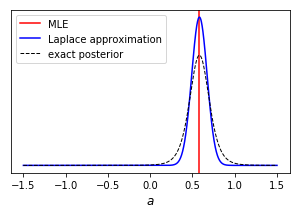

In [363]:
plt.figure(figsize=(5,3))
a_draw = np.linspace(-1.5, 1.5, 1000)
plt.axvline(a_MLE, color='red', label='MLE')
plt.plot(a_draw, norm.pdf(a_draw, 
                               loc=a_MLE, 
                               scale=np.sqrt(Sigma[0,0])),
        color='blue',
        label='Laplace approximation')
plt.plot(a_draw, t.pdf(a_draw,
                       df=(N-4),
                       loc=a_MLE, 
                       scale=np.sqrt(sigma2_MLE / (N-4) / (ev_xx - ev_x**2))
                      ),
        ls='--', lw=1, color='k', label='exact posterior')
plt.xlabel('$a$', fontsize=12)
plt.legend()
plt.gca().set_yticks([])
plt.savefig('./06-a.pdf', bbox_inches='tight')
plt.show()

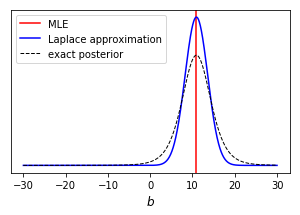

In [364]:
plt.figure(figsize=(5,3))
b_draw = np.linspace(-30, 30, 1000)
plt.axvline(b_MLE, color='red', label='MLE')
plt.plot(b_draw, norm.pdf(b_draw, 
                               loc=b_MLE, 
                               scale=np.sqrt(Sigma[1,1])),
        color='blue',
        label='Laplace approximation')
plt.plot(b_draw, t.pdf(b_draw,
                       df=(N-4),
                       loc=b_MLE, 
                       scale=np.sqrt(sigma2_MLE / (N-4) * ev_xx / (ev_xx - ev_x**2))
                      ),
        ls='--', lw=1, color='k', label='exact posterior')
plt.xlabel('$b$', fontsize=12)
plt.legend()
plt.gca().set_yticks([])
plt.savefig('./06-b.pdf', bbox_inches='tight')
plt.show()

In [321]:
from scipy.stats import multivariate_normal

In [322]:
mu = [a_MLE, b_MLE, sigma2_MLE]

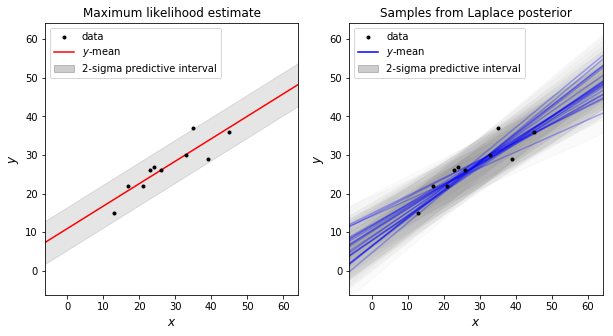

In [382]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))
ax = axes[0]
ax.plot(x, y, 'k.', label='data', zorder=10)
add_margin(ax, single_margin_ratio=0.5)
equalize_xy(ax)
x_draw = np.linspace(*(ax.get_xlim()), 100)
y_draw = x_draw * a_MLE + b_MLE
width = 2 * np.sqrt(sigma2_MLE)
ax.plot(x_draw, y_draw, '-', color='red')
ax.fill_between(x_draw, y_draw - width, y_draw + width, color='k', alpha=0.1)

ax.fill_between([], [], [], color='k', alpha=0.2, label='2-sigma predictive interval')
ax.plot([], [], color='r', label='$y$-mean')
ax.set_title('Maximum likelihood estimate')
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$y$', fontsize=12)
ax.legend(loc=2)

ax = axes[1]
ax.plot(x, y, 'k.', label='data', zorder=10)
add_margin(ax, single_margin_ratio=0.5)
equalize_xy(ax)
x_draw = np.linspace(*(ax.get_xlim()), 100)
for _ in range(20):
    a, b, sigma2 = multivariate_normal.rvs(mean=mu, cov=Sigma)
    y_draw = x_draw * a + b
    width = 2 * np.sqrt(sigma2)
    ax.plot(x_draw, y_draw, '-', color='blue', alpha=0.3)
    ax.fill_between(x_draw, y_draw - width, y_draw + width, color='k', alpha=0.02)

ax.fill_between([], [], [], color='k', alpha=0.2, label='2-sigma predictive interval')
ax.plot([], [], color='b', label='$y$-mean')
ax.set_title('Samples from Laplace posterior')
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$y$', fontsize=12)
ax.legend(loc=2)

plt.savefig('./06-linear-regression.pdf', bbox_inches='tight')

plt.show()